In [1]:
from skimage import io
from skimage import exposure
from skimage import filters
from skimage import util
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Projet

K_means

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


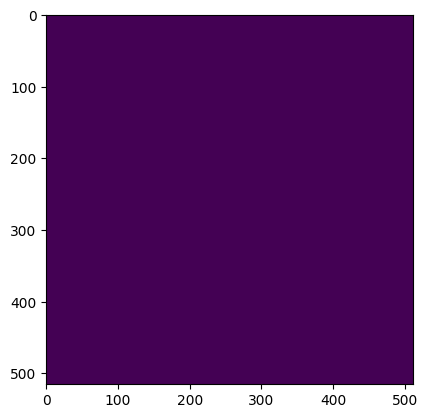

In [4]:
PetiteBete = io.imread('Image/PetiteBete.pgm')
PetiteBete = util.img_as_float(PetiteBete)

def K_means(image, nb_clusters, nb_iter):
    # Initialisation des centres
    centres = np.zeros((nb_clusters, 2))
    for i in range(nb_clusters):
        centres[i] = np.random.uniform(0, 1, 2)
    
    # Initialisation des classes
    classes = np.zeros((image.shape[0], image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            classes[i, j] = np.random.randint(0, nb_clusters)
    
    # Boucle d'optimisation
    for n in range(nb_iter):
        # Mise à jour des centres
        for i in range(nb_clusters):
            centres[i] = np.mean(image[classes == i], axis=0)
        
        # Mise à jour des classes
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                classes[i, j] = np.argmin(np.linalg.norm(image[i, j] - centres, axis=1))
    
    return classes, centres

classes, centres = K_means(PetiteBete, 2, 10)
plt.imshow(classes)
